In [18]:
from ucimlrepo import fetch_ucirepo   
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
#print conuts of y
print(y.value_counts())
# convet y to numerical values 0 if Dropout 1 if Enrolled 2 if Graduate in Y df
Y = y.replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
print(Y.value_counts())
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


Target  
Graduate    2209
Dropout     1421
Enrolled     794
dtype: int64
Target
2         2209
0         1421
1          794
dtype: int64
{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is

In [20]:
import pandas as pd
import numpy as np
#create a df with only numeric features and y
df_numeric = df[Numeric_features]
#add a colomn with y
print(df_numeric.shape)



(4424, 19)


In [21]:
#standardize the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=df_numeric.columns)
print(df_numeric_scaled.head())

   Curricular units 1st sem (without evaluations)  \
0                                       -0.199273   
1                                       -0.199273   
2                                       -0.199273   
3                                       -0.199273   
4                                       -0.199273   

   Curricular units 1st sem (grade)  Admission grade  \
0                         -2.197102         0.022229   
1                          0.693599         1.071926   
2                         -2.197102        -0.150419   
3                          0.575611        -0.509526   
4                          0.349468         1.002867   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (grade)  \
0                            -0.282442                         -1.963489   
1                            -0.282442                          0.659562   
2                            -0.282442                         -1.963489   
3                            -0.282442  

In [22]:
#one hot encoding for categorical features
df_categorical = df[Categorical_features]
df_categorical = pd.get_dummies(df_categorical, drop_first=True, columns=Categorical_features)
print(df_categorical.head())
print(df_categorical.shape)


   Marital Status_2  Marital Status_3  Marital Status_4  Marital Status_5  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 1                 0                 0                 0   

   Marital Status_6  Application mode_2  Application mode_5  \
0                 0                   0                   0   
1                 0                   0                   0   
2                 0                   0                   0   
3                 0                   0                   0   
4                 0                   0                   0   

   Application mode_7  Application mode_10  Application mode_15  ...  \
0                   0                    0                    0  ...   
1             

In [23]:
#concatenate the numeric and categorical features
df_final = pd.concat([df_numeric_scaled, df_categorical], axis=1)
df_total = pd.concat([df_numeric_scaled, df_categorical, Y], axis=1)

#delete row with 'Target' = 1
df_total=df_total[df_total['Target'] != 1]

#split X just features and Y just Target
Y = df_total['Target']
X = df_total.drop(['Target'], axis=1)

In [24]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [25]:
#train the model random forest and linear regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))

lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=10000,)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))



Random Forest
Accuracy Score:
0.8966942148760331
Confusion Matrix:
[[225  52]
 [ 23 426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       277
           2       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Logistic Regression
Accuracy Score:
0.9104683195592287
Confusion Matrix:
[[233  44]
 [ 21 428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       277
           2       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



                                     importance
Curricular units 2nd sem (approved)    0.161229
Curricular units 2nd sem (grade)       0.105713
Curricular units 1st sem (approved)    0.098152
Curricular units 1st sem (grade)       0.069851
Tuition fees up to date_1              0.057684


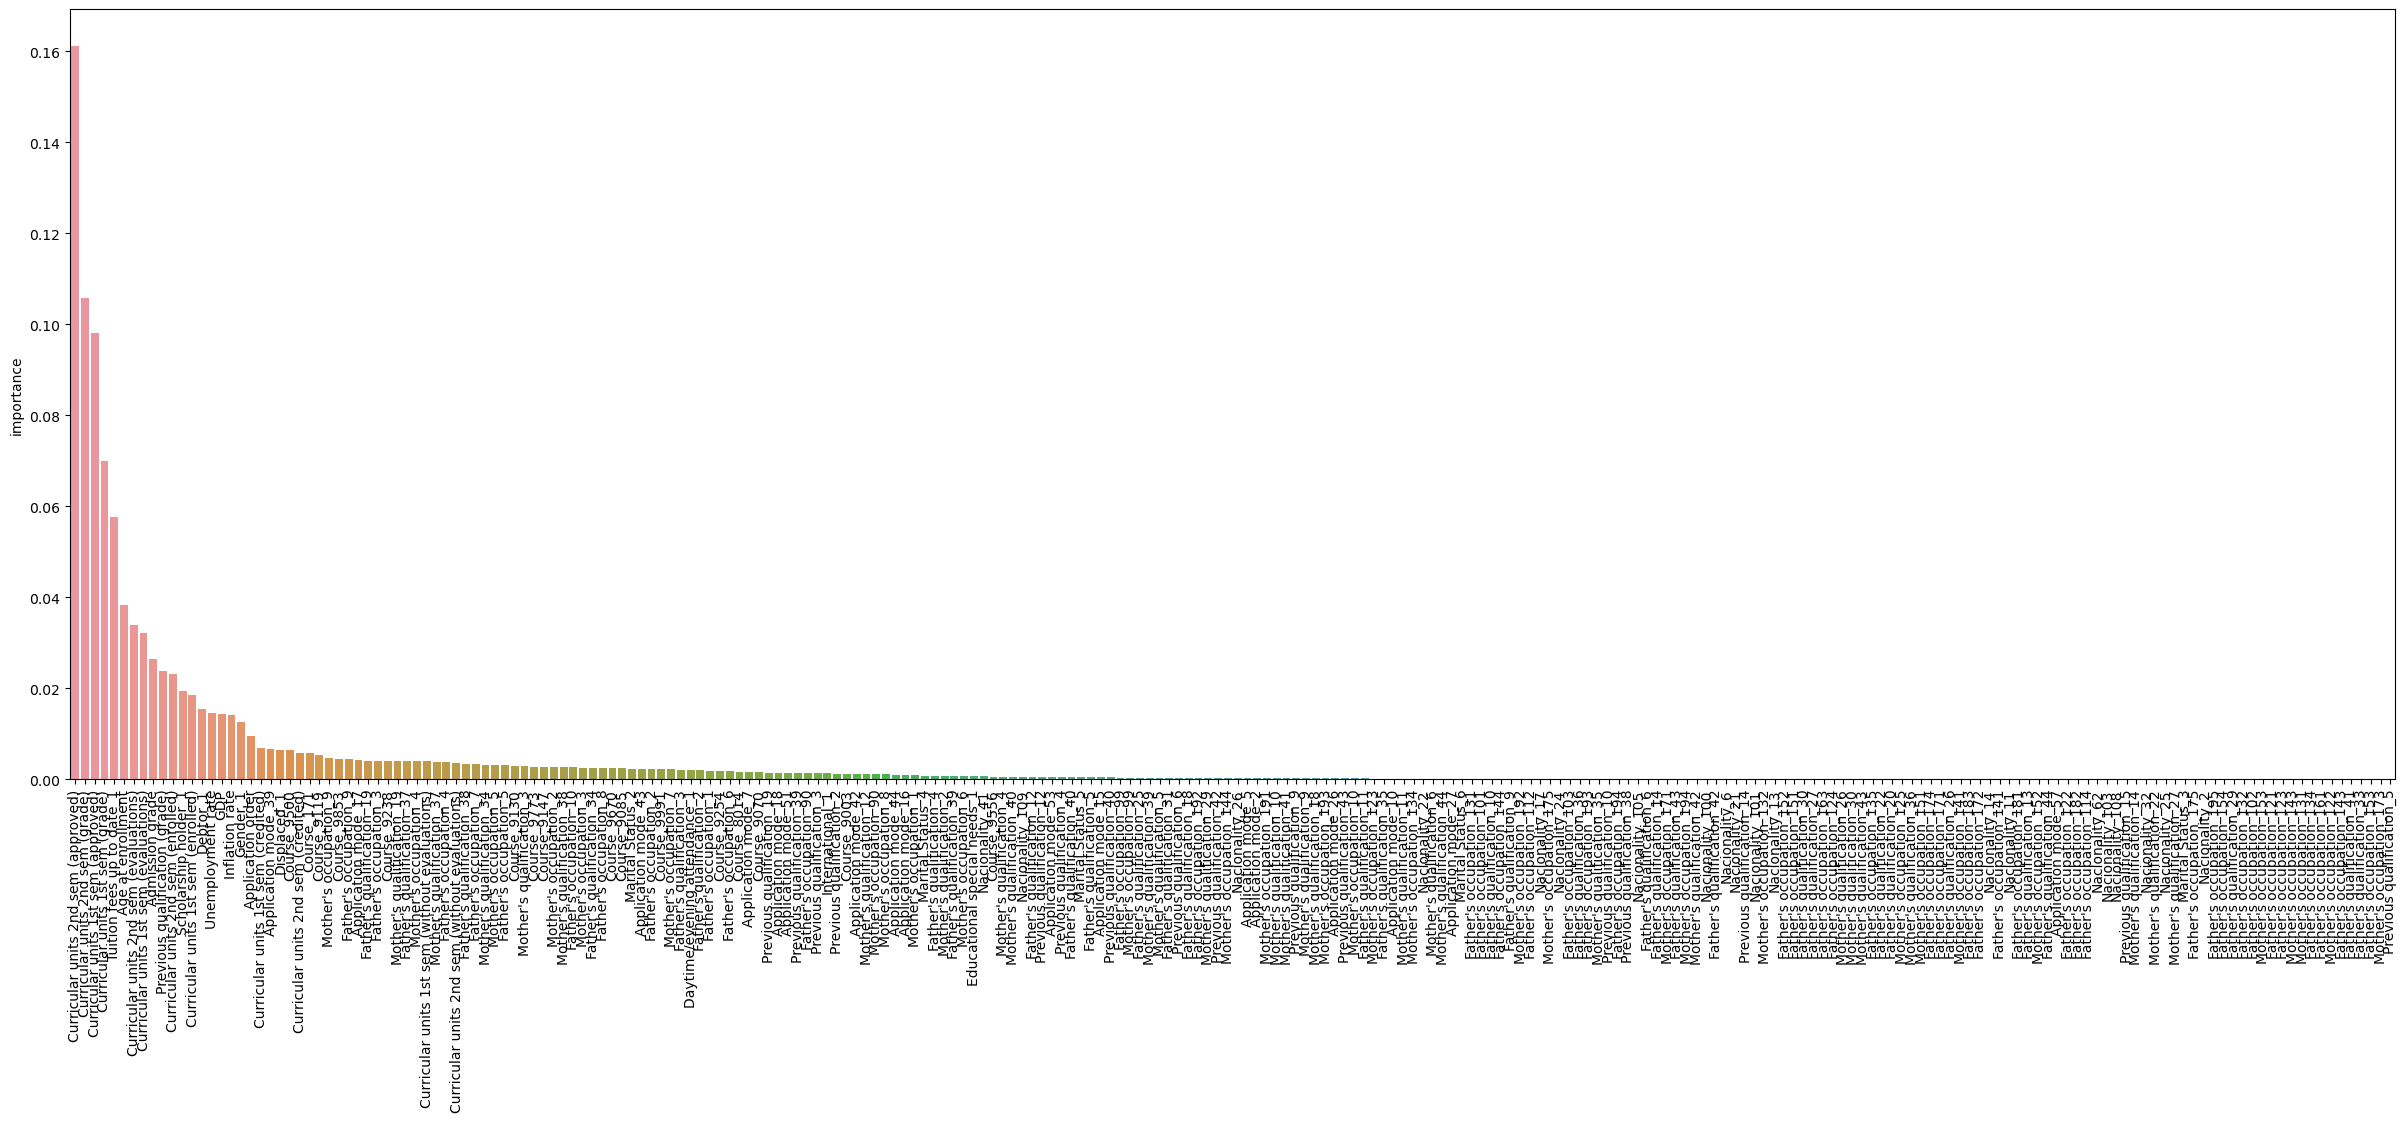

In [26]:
#plot the random forest feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())
plt.figure(figsize=(30,10))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()


                                     importance
Curricular units 2nd sem (approved)    1.432658
Tuition fees up to date_1              1.349052
Curricular units 1st sem (approved)    0.923245
Father's qualification_12              0.734056
Nacionality_26                         0.710606


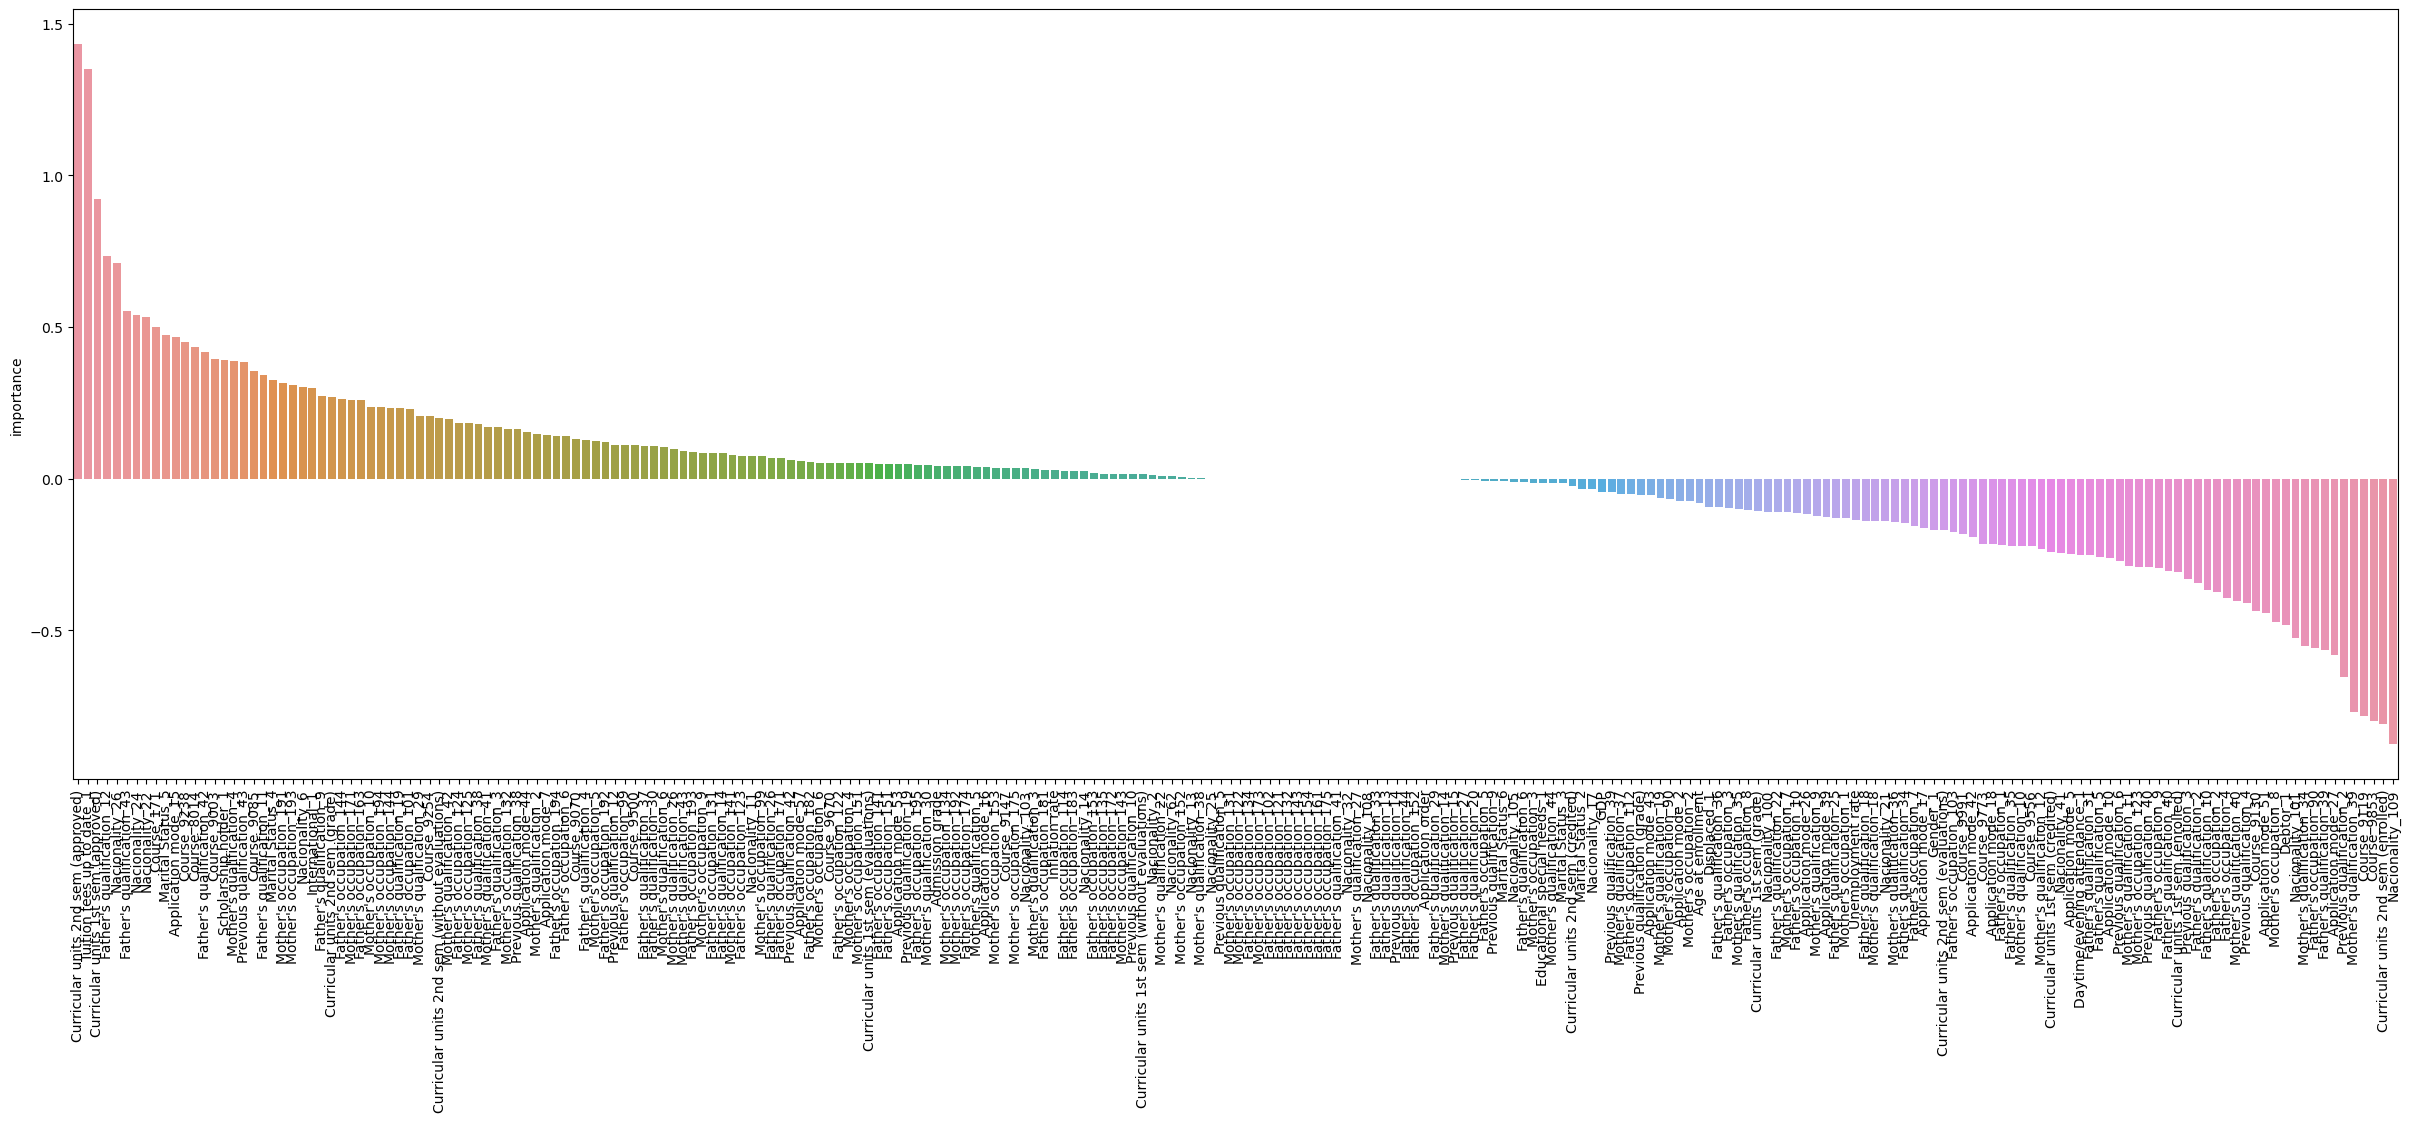

In [27]:
#plot the logistic regression feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())
plt.figure(figsize=(30,10))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()


In [28]:
#perform clustering on the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#clustiring with k = 2 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print('Kmeans with k=2')
print('Silhouette Score:')
print(silhouette_score(X_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))



c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kmeans with k=2
Silhouette Score:
0.21800433098086058
Confusion Matrix:
[[136 141   0]
 [  0   0   0]
 [ 12 437   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64       277
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00       449

    accuracy                           0.19       726
   macro avg       0.31      0.16      0.21       726
weighted avg       0.35      0.19      0.24       726



c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_cla

   principal component 1  principal component 2
0              -5.481613               0.354775
1               0.100586              -1.710872
2              -3.639833               0.885531
3               0.296019              -0.696176
4               0.176004               0.488827
(4424, 2)
(3630,)


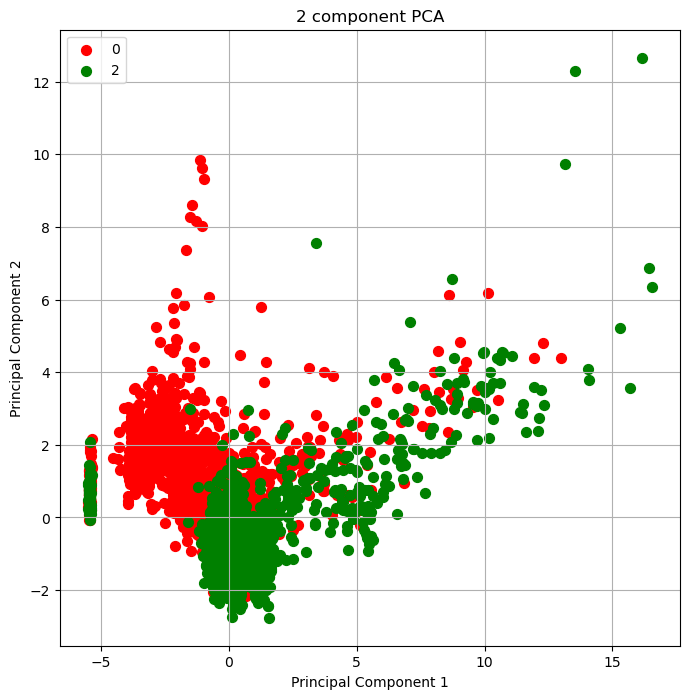

In [29]:
#do a pca on df_numeric_scaled
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())
print(principalDf.shape)
print(Y.shape)
finalDf = pd.concat([principalDf, Y], axis = 1)
#plot the pca
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
targets = [0, 2]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [30]:
df.head()
y.head()
y_number = y.replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
df_total_raw = pd.concat([df, y_number], axis=1)
#delete row with 'Target' = 1
df_total_raw=df_total_raw[df_total_raw['Target'] != 1]
df_total_raw.tail()

#split X just features and Y just Target
Y_raw = df_total_raw['Target']
X_raw = df_total_raw.drop(['Target'], axis=1)

#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw, test_size=0.2, random_state=42)



In [31]:
df

#train a logistic regression using row data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=10000,)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))



Logistic Regression
Accuracy Score:
0.9159779614325069
Confusion Matrix:
[[238  39]
 [ 22 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       277
           2       0.92      0.95      0.93       449

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



In [32]:
#clustiring with k = 2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print('Kmeans with k=2')
#acuracy
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))



c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kmeans with k=2
Accuracy Score:
0.359504132231405
Confusion Matrix:
[[261  16   0]
 [  0   0   0]
 [433  16   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.94      0.54       277
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00       449

    accuracy                           0.36       726
   macro avg       0.13      0.31      0.18       726
weighted avg       0.14      0.36      0.21       726



c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [33]:
#clusterting using SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc = SVC(random_state=42,kernel='linear',C=1)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print('SVM')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))




SVM
Accuracy Score:
0.9049586776859504
Confusion Matrix:
[[231  46]
 [ 23 426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       277
           2       0.90      0.95      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



In [34]:
#logistic regression with with cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=10000,)
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))
scores = cross_val_score(lr, X, Y, cv=5)
print(scores)
print(scores.mean())


Logistic Regression
Accuracy Score:
0.9159779614325069
Confusion Matrix:
[[238  39]
 [ 22 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       277
           2       0.92      0.95      0.93       449

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

[0.91873278 0.89807163 0.90495868 0.91322314 0.91597796]
0.9101928374655648


In [36]:
#apply a ridge regression RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge.fit(X_train, Y_train)
y_pred = ridge.predict(X_test)
print('Ridge Regression')
print('Accuracy Score:')
print(accuracy_score(Y_test, y_pred.round()))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred.round()))
print('Classification Report:')
print(classification_report(Y_test, y_pred.round()))





Ridge Regression
Accuracy Score:
0.7052341597796143
Confusion Matrix:
[[  0   0   0   0   0]
 [ 13 154  89  21   0]
 [  0   0   0   0   0]
 [  0   1  88 358   2]
 [  0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.99      0.56      0.71       277
         1.0       0.00      0.00      0.00         0
         2.0       0.94      0.80      0.86       449
         3.0       0.00      0.00      0.00         0

    accuracy                           0.71       726
   macro avg       0.39      0.27      0.32       726
weighted avg       0.96      0.71      0.81       726



c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
